# Suggested approaches to processing `ProteoMeter` output

### Import libraries and functions

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

import proteometer.parse_metadata as parse_metadata
import proteometer.quality_control_plots as qcp
from proteometer.params import Params
from proteometer.stats import (
    log2_transformation,
    recalculate_adj_pval,
    recalculate_adj_pval_proteinwise,
)
from proteometer.fasta import get_sequences_from_fasta
from proteometer.barcode import plot_pept_barcode

### Define some column and significance information

In [5]:
comparisons = ["Infected_8h/Mock_8h", "Infected_16h/Mock_16h", "Infected_24h/Mock_24h"]
additional_comparisons = [
    "Infected_16h/Infected_8h",
    "Infected_24h/Infected_16h",
    "Infected_24h/Infected_8h",
]

all_comparisons = comparisons + additional_comparisons

sig_type = "_adj-p"
sig_thresh = 0.05
lip_drop_samples = [
    "Infected_24h_1",
    "Mock_24h_1",
]

### Import user-specified metadata used to generate outputs

In [64]:
lip_par = Params("scratch.data/scratch_lip.toml")
lip_metadata = pd.read_csv(lip_par.metadata_file, sep="\t")
lip_metadata = lip_metadata[
    ~lip_metadata[lip_par.metadata_sample_col].isin(lip_drop_samples)
]
lip_int_cols = parse_metadata.int_columns(lip_metadata, lip_par)
lip_groups, _ = parse_metadata.group_columns(lip_metadata, lip_par)

ptm_par = Params("scratch.data/scratch_ptm.toml")
ptm_metadata = pd.read_csv(ptm_par.metadata_file, sep="\t")
ptm_int_cols = parse_metadata.int_columns(ptm_metadata, ptm_par)
ptm_groups, _ = parse_metadata.group_columns(ptm_metadata, ptm_par)

### Import raw data

In [ ]:
lip_double_pept_raw = pd.read_csv(
    "scratch.data/LiP/double_pept.tsv", index_col=0, sep="\t"
)
lip_double_prot_raw = pd.read_csv(
    "scratch.data/LiP/double_prot.tsv", index_col=0, sep="\t"
)
lip_trypsin_pept_raw = pd.read_csv(
    "scratch.data/LiP/trypsin_pept.tsv", index_col=0, sep="\t"
)
lip_trypsin_prot_raw = pd.read_csv(
    "scratch.data/LiP/trypsin_prot.tsv", index_col=0, sep="\t"
)
ptm_global_pept_raw = pd.read_csv(
    "scratch.data/PTM/global_pept.tsv", index_col=None, sep="\t"
)
ptm_global_prot_raw = pd.read_csv(
    "scratch.data/PTM/global_prot.tsv", index_col=None, sep="\t"
)
ptm_acetyl_pept_raw = pd.read_csv(
    "scratch.data/PTM/acetyl_pept.tsv", index_col=0, sep="\t"
)
ptm_redox_pept_raw = pd.read_csv(
    "scratch.data/PTM/redox_pept.tsv", index_col=0, sep="\t"
)
ptm_phospho_pept_raw = pd.read_csv(
    "scratch.data/PTM/phospho_pept.tsv", index_col=0, sep="\t"
)

fasta = get_sequences_from_fasta(lip_par.fasta_file)
protein_lengths = {record.id.split("|")[-1]: len(record.seq) for record in fasta}
prot_seq = {record.id.split("|")[-1]: str(record.seq) for record in fasta}

### Examine correlation plots for raw data to look for outlier samples

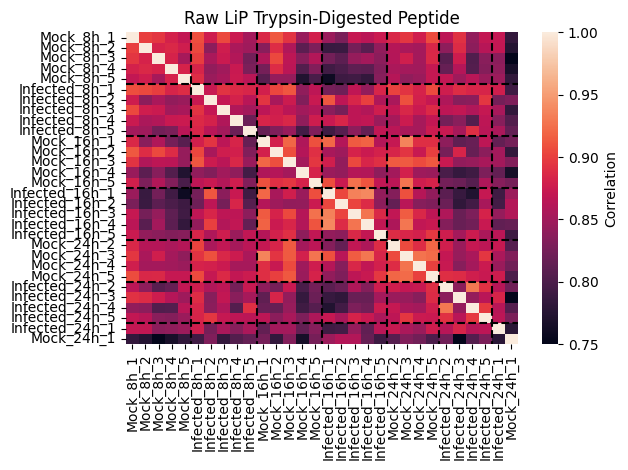

In [59]:
fig, ax = plt.subplots(1, 1)
qcp.correlation_plot(
    log2_transformation(lip_trypsin_pept_raw, lip_int_cols + lip_drop_samples).dropna(),
    lip_int_cols + lip_drop_samples,
    ax=ax,
)
ax.set_title("Raw LiP Trypsin-Digested Peptide")
ax.hlines(
    [5, 10, 15, 20, 24, 28],
    0,
    len(lip_int_cols) + 2,
    colors="k",
    linestyles="dashed",
)
ax.vlines(
    [5, 10, 15, 20, 24, 28],
    0,
    len(lip_int_cols) + 2,
    colors="k",
    linestyles="dashed",
)
fig.tight_layout()
fig.savefig("figures/lip_trypsin_pept_raw.png")
plt.show()

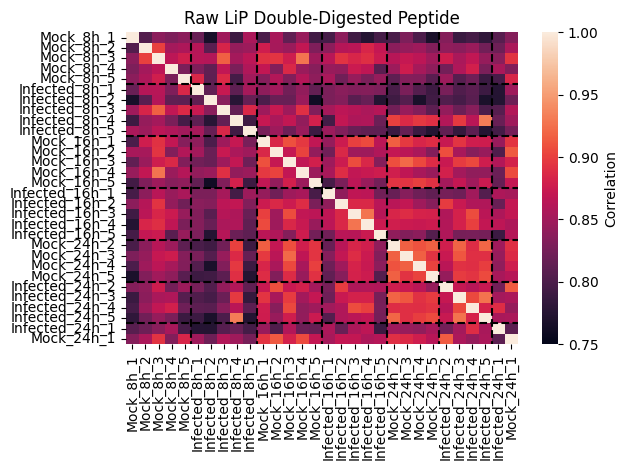

In [58]:
fig, ax = plt.subplots(1, 1)
qcp.correlation_plot(
    log2_transformation(lip_double_pept_raw, lip_int_cols + lip_drop_samples),
    lip_int_cols + lip_drop_samples,
    ax=ax,
)
ax.set_title("Raw LiP Double-Digested Peptide")
ax.hlines(
    [5, 10, 15, 20, 24, 28],
    0,
    len(lip_int_cols) + 2,
    colors="k",
    linestyles="dashed",
)
ax.vlines(
    [5, 10, 15, 20, 24, 28],
    0,
    len(lip_int_cols) + 2,
    colors="k",
    linestyles="dashed",
)
fig.tight_layout()
fig.savefig("figures/lip_double_pept_raw.png")
plt.show()

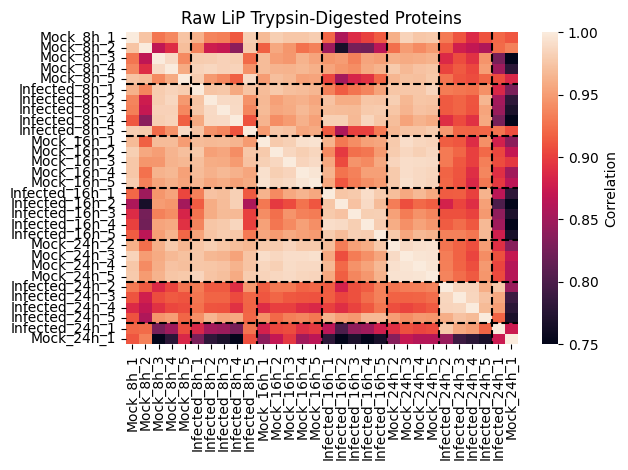

In [57]:
fig, ax = plt.subplots(1, 1)
qcp.correlation_plot(lip_trypsin_prot_raw, lip_int_cols + lip_drop_samples, ax=ax)
ax.set_title("Raw LiP Trypsin-Digested Proteins")
ax.hlines(
    [5, 10, 15, 20, 24, 28],
    0,
    len(lip_int_cols) + 2,
    colors="k",
    linestyles="dashed",
)
ax.vlines(
    [5, 10, 15, 20, 24, 28],
    0,
    len(lip_int_cols) + 2,
    colors="k",
    linestyles="dashed",
)
fig.tight_layout()
fig.savefig("figures/lip_trypsin_prot_raw.png")
plt.show()

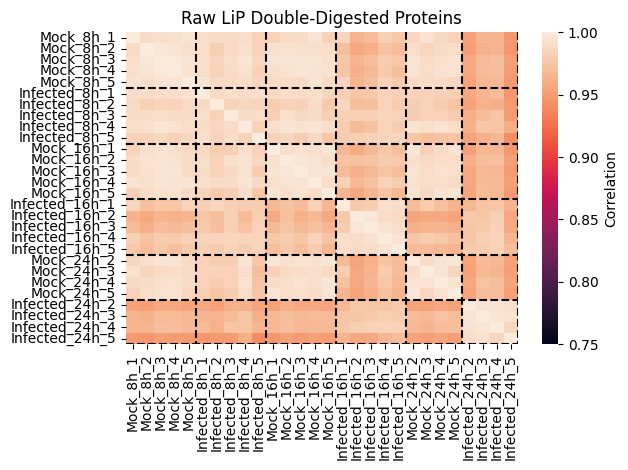

In [56]:
fig, ax = plt.subplots(1, 1)
qcp.correlation_plot(lip_double_prot_raw, lip_int_cols, ax=ax)
ax.set_title("Raw LiP Double-Digested Proteins")
ax.hlines(
    [5, 10, 15, 20, 24, 28],
    0,
    len(lip_int_cols) + 2,
    colors="k",
    linestyles="dashed",
)
ax.vlines(
    [5, 10, 15, 20, 24, 28],
    0,
    len(lip_int_cols) + 2,
    colors="k",
    linestyles="dashed",
)
fig.tight_layout()
fig.savefig("figures/lip_double_prot_raw.png")
plt.show()

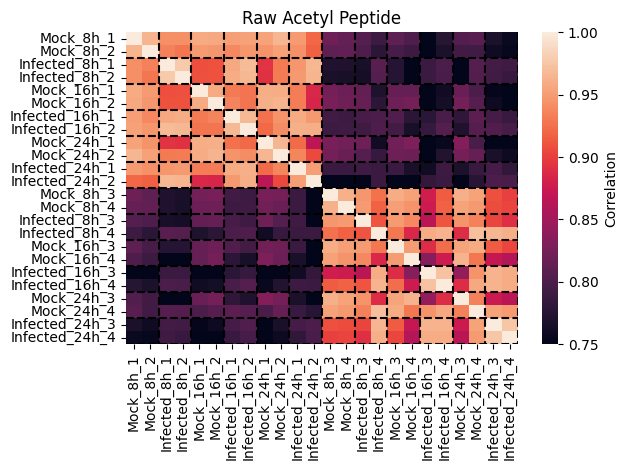

In [60]:
fig, ax = plt.subplots(1, 1)
qcp.correlation_plot(
    ptm_acetyl_pept_raw,
    [c for c in ptm_int_cols if "Total" not in c],
    ax=ax,
)
ax.set_title("Raw Acetyl Peptide")
ax.hlines(
    range(2, len(ptm_int_cols), 2),
    0,
    len(lip_int_cols) + 2,
    colors="k",
    linestyles="dashed",
)
ax.vlines(
    range(2, len(ptm_int_cols), 2),
    0,
    len(lip_int_cols) + 2,
    colors="k",
    linestyles="dashed",
)
fig.tight_layout()
fig.savefig("figures/ptm_acetyl_pept_raw.png")
plt.show()

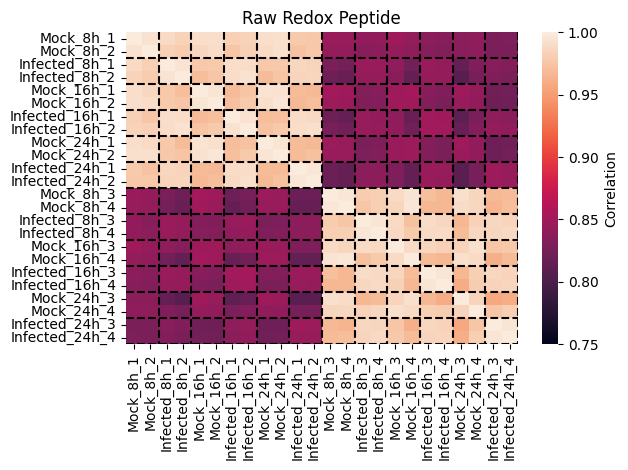

In [61]:
fig, ax = plt.subplots(1, 1)
qcp.correlation_plot(
    ptm_redox_pept_raw,
    [c for c in ptm_int_cols if "Total" not in c],
    ax=ax,
)
ax.set_title("Raw Redox Peptide")
ax.hlines(
    range(2, len(ptm_int_cols), 2),
    0,
    len(lip_int_cols) + 2,
    colors="k",
    linestyles="dashed",
)
ax.vlines(
    range(2, len(ptm_int_cols), 2),
    0,
    len(lip_int_cols) + 2,
    colors="k",
    linestyles="dashed",
)
fig.tight_layout()
fig.savefig("figures/ptm_redox_pept_raw.png")
plt.show()

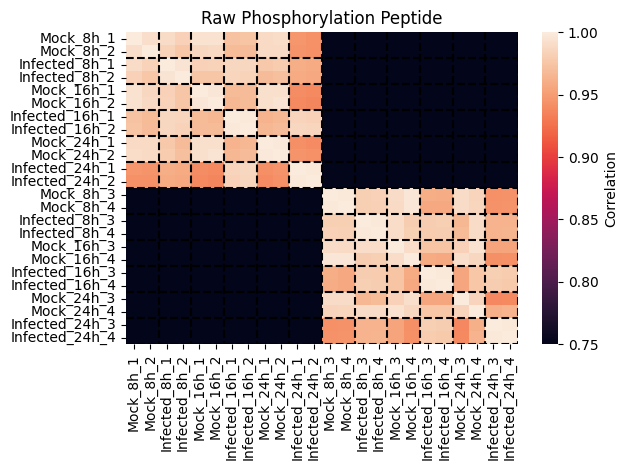

In [62]:
fig, ax = plt.subplots(1, 1)
qcp.correlation_plot(
    ptm_phospho_pept_raw,
    [c for c in ptm_int_cols if "Total" not in c],
    ax=ax,
)
ax.set_title("Raw Phosphorylation Peptide")
ax.hlines(
    range(2, len(ptm_int_cols), 2),
    0,
    len(lip_int_cols) + 2,
    colors="k",
    linestyles="dashed",
)
ax.vlines(
    range(2, len(ptm_int_cols), 2),
    0,
    len(lip_int_cols) + 2,
    colors="k",
    linestyles="dashed",
)
fig.tight_layout()
fig.savefig("figures/ptm_phospho_pept_raw.png")
plt.show()

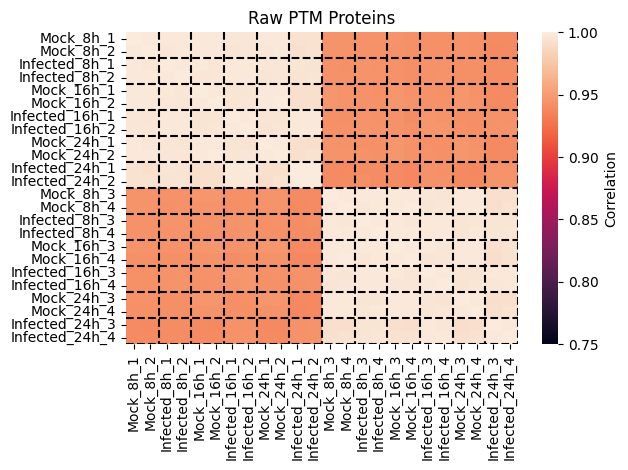

In [63]:
fig, ax = plt.subplots(1, 1)
qcp.correlation_plot(
    ptm_global_prot_raw, [c for c in ptm_int_cols if "Total" not in c], ax=ax
)
ax.set_title("Raw PTM Proteins")
ax.hlines(
    range(2, len(ptm_int_cols), 2),
    0,
    len(lip_int_cols) + 2,
    colors="k",
    linestyles="dashed",
)
ax.vlines(
    range(2, len(ptm_int_cols), 2),
    0,
    len(lip_int_cols) + 2,
    colors="k",
    linestyles="dashed",
)
fig.tight_layout()
fig.savefig("figures/ptm_global_prot_raw.png")
plt.show()

### Import processed data (see `demonstration.py`)

In [ ]:
lip_pept_full = pd.read_csv("scratch.data/scratch_lip_processed_pept.csv", index_col=0)
lip_site_full = pd.read_csv("scratch.data/scratch_lip_processed_site.csv", index_col=0)
lip_prot_full = pd.read_csv("scratch.data/scratch_lip_processed_prot.csv", index_col=0)
ptm_site_full = pd.read_csv("scratch.data/scratch_ptm_processed_site.csv", index_col=0)
ptm_prot_full = pd.read_csv("scratch.data/scratch_ptm_processed_prot.csv", index_col=0)

### Assess quality of batch correction in PTM data

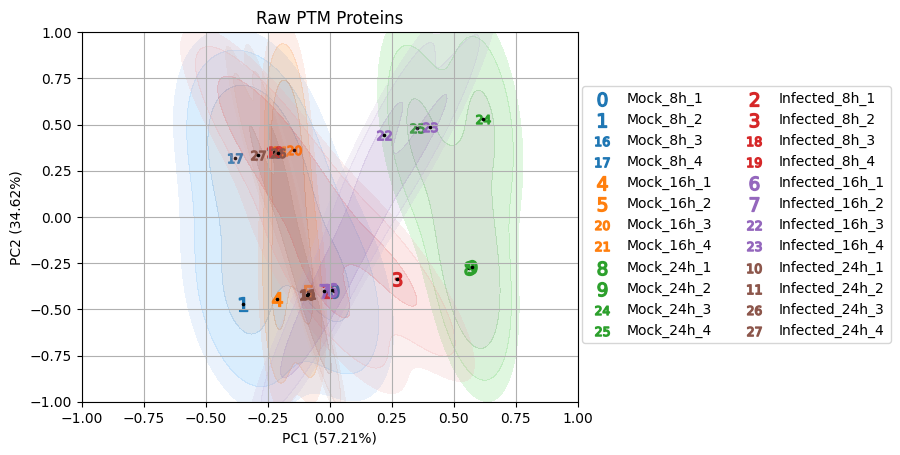

In [69]:
fig, ax = plt.subplots(1, 1)
qcp.biplot(ptm_global_prot_raw.dropna(), ptm_int_cols, ptm_groups, ax=ax)
ax.set_title("Raw PTM Proteins")
fig.legend(ncols=2, bbox_to_anchor=(1.4, 0.5), loc="center right")
fig.savefig("figures/ptm_pca_raw.png", bbox_inches="tight")
plt.show()

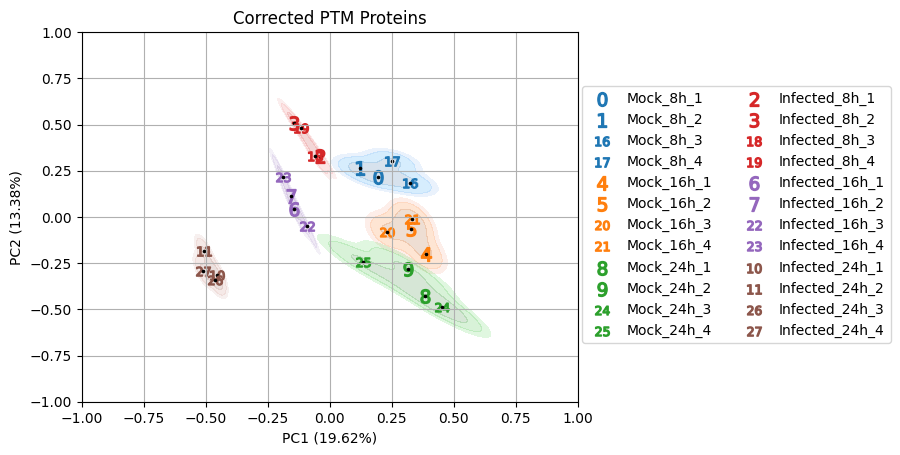

In [68]:
fig, ax = plt.subplots(1, 1)
qcp.biplot(ptm_prot_full.dropna(), ptm_int_cols, ptm_groups, ax=ax)
ax.set_title("Corrected PTM Proteins")
fig.legend(ncols=2, bbox_to_anchor=(1.4, 0.5), loc="center right")
fig.savefig("figures/ptm_pca.png", bbox_inches="tight")
plt.show()

### Extract ProK sites and Tryptic peptides

In [ ]:
lip_prok_full = recalculate_adj_pval(
    lip_site_full[lip_site_full["Type"] == "ProK"], all_comparisons
)
lip_pept_full_tryptic = recalculate_adj_pval(
    lip_pept_full[(lip_pept_full["pept_type"] == "Tryptic")], all_comparisons
)

### Calculate the interesetion of proteins captured across data sets

In [51]:
all_proteins = (
    set(lip_prot_full["Protein"].unique())
    | set(ptm_prot_full["Protein"].unique())
    | set(lip_pept_full_tryptic["Protein"].unique())
    | set(ptm_site_full["Protein"].unique())
)

good_proteins = (
    set(lip_prot_full["Protein"].unique())
    & set(ptm_prot_full["Protein"].unique())
    & set(lip_pept_full_tryptic["Protein"].unique())
    & set(ptm_site_full["Protein"].unique())
)

print(len(all_proteins), len(good_proteins))

8777 2479


### Restrict analysis and statistics to this intersection set

In [7]:
lip_pept = recalculate_adj_pval_proteinwise(
    lip_pept_full[lip_pept_full["Protein"].isin(good_proteins)], all_comparisons
)
lip_site = recalculate_adj_pval_proteinwise(
    lip_site_full[lip_site_full["Protein"].isin(good_proteins)], all_comparisons
)

lip_prot = recalculate_adj_pval(
    lip_prot_full[lip_prot_full["Protein"].isin(good_proteins)], all_comparisons
)

ptm_dfs = [
    ptm_site_full[ptm_site_full["Type"] == ptm_type] for ptm_type in ["Ox", "Ph", "Ac"]
]
ptm_site = pd.concat(
    [
        recalculate_adj_pval(
            ptm_df[ptm_df["Protein"].isin(good_proteins)], all_comparisons
        )
        for ptm_df in ptm_dfs
    ]
)

ptm_prot = recalculate_adj_pval(
    ptm_prot_full[ptm_prot_full["Protein"].isin(good_proteins)], all_comparisons
)

lip_prok = recalculate_adj_pval_proteinwise(
    lip_site[lip_site["Type"] == "ProK"], all_comparisons
)
lip_pept_tryptic = recalculate_adj_pval_proteinwise(
    lip_pept[(lip_pept["pept_type"] == "Tryptic")], all_comparisons
)

8777 2427


### Count up and display significant identifications

In [8]:
# type: ignore
print("LiP Site (ProK) # Significant")
print("-" * 30)
total = 0
for comparison in all_comparisons:
    lip_site_sig = lip_site[
        (lip_site[comparison + sig_type] < sig_thresh) & (lip_site["Type"] == "ProK")
    ]
    print(comparison, len(lip_site_sig["Protein"].unique()))
    total += len(lip_site_sig["Protein"].unique())
print("TOTAL = ", total)
print()
print("LiP Peptide (Tryptic) # Significant")
print("-" * 30)
total = 0
for comparison in all_comparisons:
    lip_pept_sig = lip_pept[
        (lip_pept[comparison + sig_type] < sig_thresh)
        & (lip_pept["pept_type"] == "Tryptic")
    ]
    print(comparison, len(lip_pept_sig))
    total += len(lip_pept_sig)
print("TOTAL = ", total)
print()
print("LiP Protein # Significant")
print("-" * 30)
total = 0
for comparison in all_comparisons:
    lip_prot_sig = lip_prot[(lip_prot[comparison + sig_type] < sig_thresh)]
    print(comparison, len(lip_prot_sig))
    total += len(lip_prot_sig)
print("TOTAL = ", total)
print()
print("PTM Site # Significant")
print("-" * 30)
total = 0
for comparison in all_comparisons:
    ptm_site_sig = ptm_site[(ptm_site[comparison + sig_type] < sig_thresh)]
    print(comparison, len(ptm_site_sig))
    total += len(ptm_site_sig)
print("TOTAL = ", total)
print()
print("PTM Protein # Significant")
print("-" * 30)
total = 0
for comparison in all_comparisons:
    ptm_prot_sig = ptm_prot[(ptm_prot[comparison + sig_type] < sig_thresh)]
    print(comparison, len(ptm_prot_sig))
    total += len(ptm_prot_sig)
print("TOTAL = ", total)

LiP Site (ProK) # Significant
------------------------------
Infected_8h/Mock_8h 35
Infected_16h/Mock_16h 58
Infected_24h/Mock_24h 58
Infected_16h/Infected_8h 44
Infected_24h/Infected_16h 154
Infected_24h/Infected_8h 69
TOTAL =  418

LiP Peptide (Tryptic) # Significant
------------------------------
Infected_8h/Mock_8h 93
Infected_16h/Mock_16h 114
Infected_24h/Mock_24h 189
Infected_16h/Infected_8h 110
Infected_24h/Infected_16h 594
Infected_24h/Infected_8h 223
TOTAL =  1323

LiP Protein # Significant
------------------------------
Infected_8h/Mock_8h 1
Infected_16h/Mock_16h 107
Infected_24h/Mock_24h 203
Infected_16h/Infected_8h 321
Infected_24h/Infected_16h 497
Infected_24h/Infected_8h 34
TOTAL =  1163

PTM Site # Significant
------------------------------
Infected_8h/Mock_8h 1971
Infected_16h/Mock_16h 4002
Infected_24h/Mock_24h 4769
Infected_16h/Infected_8h 405
Infected_24h/Infected_16h 1403
Infected_24h/Infected_8h 1298
TOTAL =  13848

PTM Protein # Significant
-----------------------

### Generate volcano plots

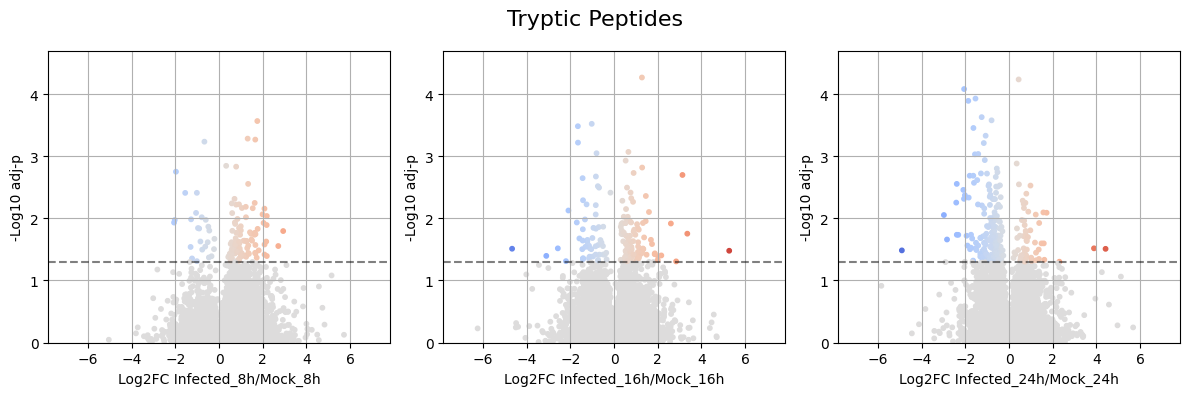

In [11]:
# type: ignore
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

xscale = lip_pept_tryptic[comparisons].abs().max(axis=None) * 1.1
yscale = (
    -np.log10(lip_pept_tryptic[[c + sig_type for c in comparisons]].min().min()) * 1.1
)

for ax, comparison in zip(axs, comparisons):
    qcp.volcano_plot(
        lip_pept_tryptic,
        comparison=comparison,
        sig_type=sig_type[1:],  # don't want the leading underscore here
        sig_thresh=sig_thresh,
        ax=ax,
    )
    ax.set_xlim(-xscale, xscale)  # will be set in volcano_plot, but want all to share
    ax.set_ylim(0, yscale)
fig.suptitle("Tryptic Peptides", fontsize=16)
fig.tight_layout()
fig.savefig("figures/tryp_volcano.png")
plt.show()

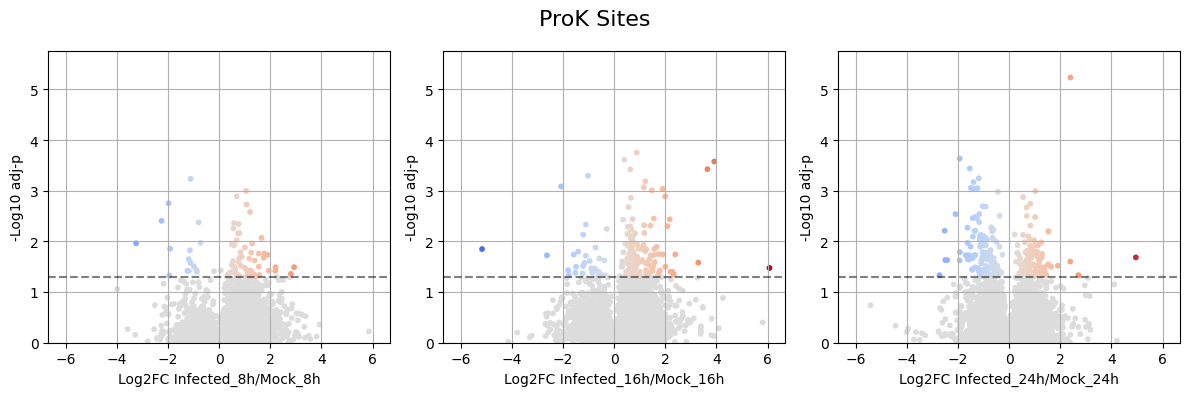

In [12]:
# type: ignore
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

xscale = lip_prok[comparisons].abs().max(axis=None) * 1.1
yscale = -np.log10(lip_prok[[c + sig_type for c in comparisons]].min().min()) * 1.1

for ax, comparison in zip(axs, comparisons):
    qcp.volcano_plot(
        lip_prok,
        comparison=comparison,
        sig_type=sig_type[1:],  # don't want the leading underscore here
        sig_thresh=sig_thresh,
        ax=ax,
    )
    ax.set_xlim(-xscale, xscale)  # will be set in volcano_plot, but want all to share
    ax.set_ylim(0, yscale)
fig.suptitle("ProK Sites", fontsize=16)
fig.tight_layout()
fig.savefig("figures/prok_volcano.png")
plt.show()

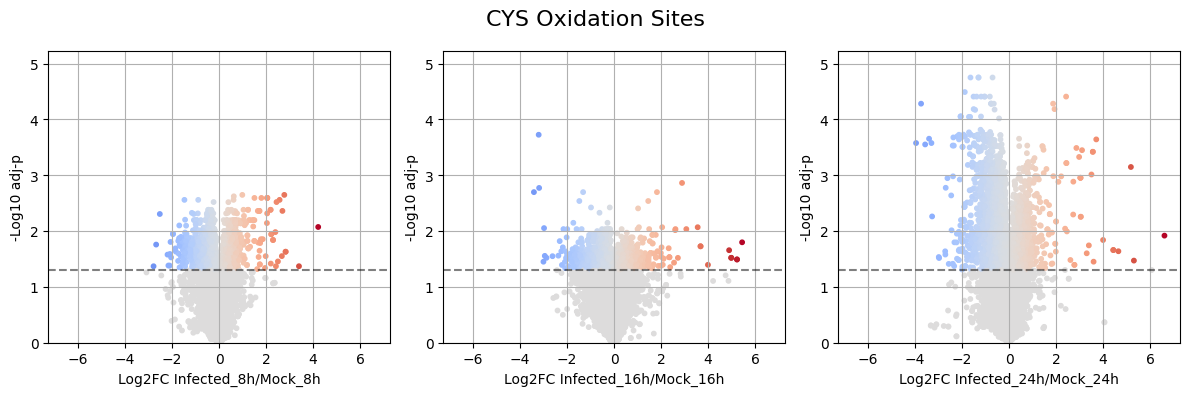

In [13]:
# type: ignore
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

xscale = (
    ptm_site_full[ptm_site_full["Type"] == "Ox"][comparisons].abs().max(axis=None) * 1.1
)
yscale = (
    -np.log10(
        ptm_site_full[ptm_site_full["Type"] == "Ox"][
            [c + sig_type for c in comparisons]
        ]
        .min()
        .min()
    )
    * 1.1
)

for ax, comparison in zip(axs, comparisons):
    qcp.volcano_plot(
        ptm_site_full[ptm_site_full["Type"] == "Ox"],
        comparison=comparison,
        sig_type=sig_type[1:],  # don't want the leading underscore here
        sig_thresh=sig_thresh,
        ax=ax,
    )
    ax.set_xlim(-xscale, xscale)  # will be set in volcano_plot, but want all to share
    ax.set_ylim(0, yscale)

fig.suptitle("CYS Oxidation Sites", fontsize=16)
fig.tight_layout()
fig.savefig("figures/ox_volcano.png")
plt.show()

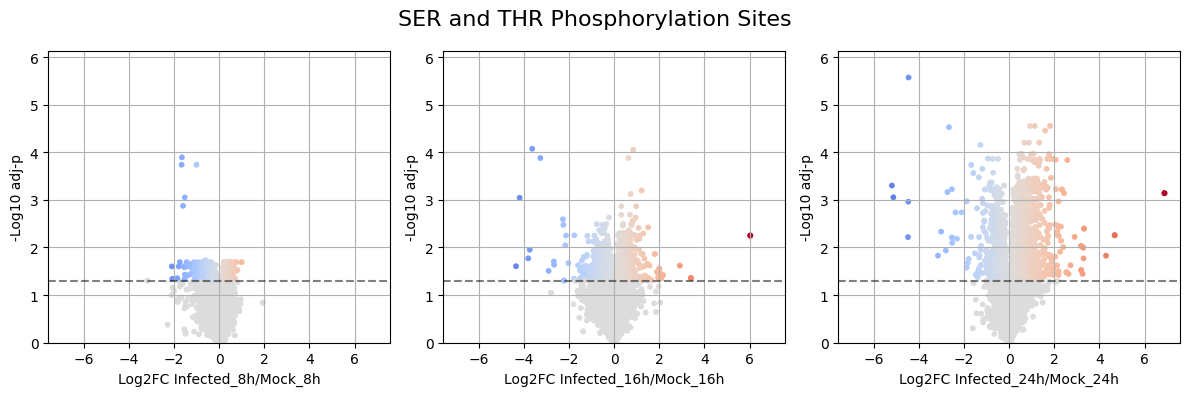

In [14]:
# type: ignore
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

xscale = (
    ptm_site_full[ptm_site_full["Type"] == "Ph"][comparisons].abs().max(axis=None) * 1.1
)
yscale = (
    -np.log10(
        ptm_site_full[ptm_site_full["Type"] == "Ph"][
            [c + sig_type for c in comparisons]
        ]
        .min()
        .min()
    )
    * 1.1
)

for ax, comparison in zip(axs, comparisons):
    qcp.volcano_plot(
        ptm_site_full[ptm_site_full["Type"] == "Ph"],
        comparison=comparison,
        sig_type=sig_type[1:],  # don't want the leading underscore here
        sig_thresh=sig_thresh,
        ax=ax,
    )
    ax.set_xlim(-xscale, xscale)  # will be set in volcano_plot, but want all to share
    ax.set_ylim(0, yscale)

fig.suptitle("SER and THR Phosphorylation Sites", fontsize=16)
fig.tight_layout()
fig.savefig("figures/ph_volcano.png")
plt.show()

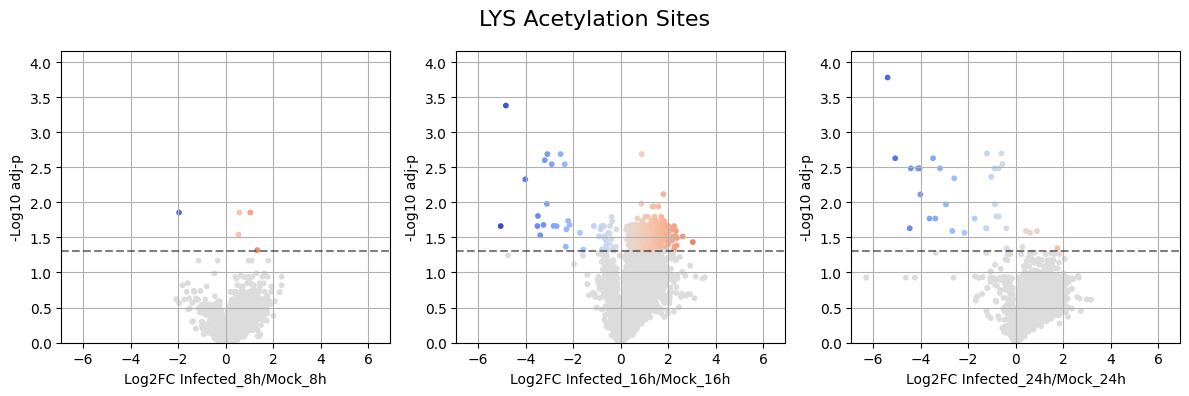

In [15]:
# type: ignore
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

xscale = (
    ptm_site_full[ptm_site_full["Type"] == "Ac"][comparisons].abs().max(axis=None) * 1.1
)
yscale = (
    -np.log10(
        ptm_site_full[ptm_site_full["Type"] == "Ac"][
            [c + sig_type for c in comparisons]
        ]
        .min()
        .min()
    )
    * 1.1
)

for ax, comparison in zip(axs, comparisons):
    qcp.volcano_plot(
        ptm_site_full[ptm_site_full["Type"] == "Ac"],
        comparison=comparison,
        sig_type=sig_type[1:],  # don't want the leading underscore here
        sig_thresh=sig_thresh,
        ax=ax,
    )
    ax.set_xlim(-xscale, xscale)  # will be set in volcano_plot, but want all to share
    ax.set_ylim(0, yscale)
fig.suptitle("LYS Acetylation Sites", fontsize=16)
fig.tight_layout()
fig.savefig("figures/ac_volcano.png")
plt.show()

### Get a list of proteins with ProK sites inside observed tryptic peptides (both with significant changes at q<0.1)

In [ ]:
# type: ignore
all_tryp_matches = []
for comparison in comparisons:
    lip_prok_sig = lip_prok[
        lip_prok[f"{comparison}{sig_type}"] < 0.1
    ]  # note that we use a lower significance threshold here because we need both tests to pass in the same location
    lip_tryp_sig = lip_pept_tryptic[lip_pept_tryptic[f"{comparison}{sig_type}"] < 0.1]
    for _, lip_prok_row in lip_prok_sig.iterrows():
        tryp_matches = lip_tryp_sig[
            (lip_prok_row["Protein"] == lip_tryp_sig["Protein"])
            & (lip_prok_row["Pos"] <= lip_tryp_sig["pept_end"])
            & (lip_prok_row["Pos"] >= lip_tryp_sig["pept_start"])
        ].copy()
        if tryp_matches.shape[0]:
            tryp_matches["Pos"] = [lip_prok_row["Pos"]] * tryp_matches.shape[0]
            tryp_matches["Condition"] = [comparison] * tryp_matches.shape[0]
            tryp_matches["ProK FC"] = [lip_prok_row[comparison]] * tryp_matches.shape[0]
            tryp_matches["Tryp FC"] = tryp_matches[comparison]
            all_tryp_matches.append(tryp_matches)

all_tryp_matches = pd.concat(all_tryp_matches)
all_tryp_matches

,Peptide,UniProt,Protein,Infected_8h_1,Infected_8h_2,Infected_8h_3,Infected_8h_4,Infected_8h_5,Mock_8h_1,Mock_8h_2,...,Infected_24h/Infected_16h_pval,Infected_24h/Infected_16h_adj-p,clean_pept,pept_start,pept_end,pept_type,Pos,Condition,ProK FC,Tryp FC
UBP2L_HUMAN@DGSLASNPYSGDLTK,DGSLASNPYSGDLTK,UBP2L_HUMAN,UBP2L_HUMAN,26.045610,26.952227,26.502485,26.272920,25.787777,25.323776,25.032378,...,0.884308,0.884308,DGSLASNPYSGDLTK,850,864,Tryptic,854.0,Infected_8h/Mock_8h,1.764882,1.046244
THOC4_HUMAN@SLGTADVHFER,SLGTADVHFER,THOC4_HUMAN,THOC4_HUMAN,NaN,26.906000,27.646169,28.733879,27.512611,NaN,NaN,...,0.735359,0.787356,SLGTADVHFER,145,155,Tryptic,146.0,Infected_8h/Mock_8h,0.927370,2.080719
YBOX3_HUMAN@AGEAPTENPAPPTQQSSAE,AGEAPTENPAPPTQQSSAE,YBOX3_HUMAN,YBOX3_HUMAN,25.195443,25.756392,25.470908,NaN,25.119542,24.750452,24.881443,...,0.000100,0.000299,AGEAPTENPAPPTQQSSAE,354,372,Tryptic,372.0,Infected_8h/Mock_8h,0.597431,0.597431
RL10_HUMAN@EHVIEALR,EHVIEALR,RL10_HUMAN,RL10_HUMAN,NaN,25.534064,NaN,NaN,NaN,24.553494,NaN,...,NaN,NaN,EHVIEALR,146,153,Tryptic,152.0,Infected_8h/Mock_8h,1.280867,0.953458
RL10_HUMAN@FNADEFEDMVAEK,FNADEFEDMVAEK,RL10_HUMAN,RL10_HUMAN,25.039192,NaN,25.836741,26.304797,26.187278,25.422018,24.660682,...,0.576818,0.687242,FNADEFEDMVAEK,176,188,Tryptic,176.0,Infected_8h/Mock_8h,1.252527,0.975000
RL10_HUMAN@FNADEFEDMVAEK,FNADEFEDMVAEK,RL10_HUMAN,RL10_HUMAN,25.039192,NaN,25.836741,26.304797,26.187278,25.422018,24.660682,...,0.576818,0.687242,FNADEFEDMVAEK,176,188,Tryptic,179.0,Infected_8h/Mock_8h,0.817445,0.975000
PP4C_HUMAN@KPVADYFL,KPVADYFL,PP4C_HUMAN,PP4C_HUMAN,23.453396,24.547179,23.730229,23.651796,23.391065,22.729262,22.766431,...,0.670129,0.670129,KPVADYFL,300,307,Tryptic,307.0,Infected_8h/Mock_8h,0.861350,0.861350
RUXE_HUMAN@GDNITLLQSVSN,GDNITLLQSVSN,RUXE_HUMAN,RUXE_HUMAN,26.090048,26.251155,NaN,26.046204,NaN,NaN,27.554191,...,0.067578,0.135156,GDNITLLQSVSN,81,92,Tryptic,88.0,Infected_8h/Mock_8h,-2.166112,-1.973674
RUXE_HUMAN@GDNITLLQSVSN,GDNITLLQSVSN,RUXE_HUMAN,RUXE_HUMAN,26.090048,26.251155,NaN,26.046204,NaN,NaN,27.554191,...,0.067578,0.135156,GDNITLLQSVSN,81,92,Tryptic,92.0,Infected_8h/Mock_8h,-1.973674,-1.973674
ABCE1_HUMAN@AIIKPQYVDQIPK,AIIKPQYVDQIPK,ABCE1_HUMAN,ABCE1_HUMAN,NaN,24.855207,NaN,26.197449,NaN,NaN,NaN,...,0.045630,0.319409,AIIKPQYVDQIPK,166,178,Tryptic,171.0,Infected_16h/Mock_16h,0.288712,-2.342616


### Find proteins among the above with significant tryptic peptide changes and significant PTM changes (both at q<0.05)

In [ ]:
# type: ignore
match_dicts = []
for comparison in comparisons:
    ptm_site_sig = ptm_site[ptm_site[f"{comparison}{sig_type}"] < sig_thresh]
    lip_tryp_sig = lip_pept_tryptic[
        lip_pept_tryptic[f"{comparison}{sig_type}"] < sig_thresh
    ]

    for _, lip_tryp_row in lip_tryp_sig.iterrows():
        if (
            lip_tryp_row["Protein"] not in good_proteins
            or lip_tryp_row["Protein"] not in all_tryp_matches["Protein"].unique()
        ):
            continue
        # if lip_tryp_row["Protein"] not in good_proteins:
        #     continue
        sites = ptm_site_sig[(ptm_site_sig["Protein"] == lip_tryp_row["Protein"])]
        if not sites.empty:
            for _, site in sites.iterrows():
                match_row = {
                    "protein": lip_tryp_row["Protein"],
                    "comparison": comparison,
                    "lip_start": lip_tryp_row["pept_start"],
                    "lip_end": lip_tryp_row["pept_end"],
                    "lip_log2fc": lip_tryp_row[f"{comparison}"],
                    "lip_adj_pval": lip_tryp_row[f"{comparison}{sig_type}"],
                    "lip_pval": lip_tryp_row[f"{comparison}_pval"],
                    "ptm_pept": site["Peptide"],
                    "ptm_number": site["Site"],
                    "ptm_log2fc": site[f"{comparison}"],
                    "ptm_adj_pval": site[f"{comparison}{sig_type}"],
                    "ptm_pval": site[f"{comparison}_pval"],
                    "ptm_type": site["Type"],
                }
                match_dicts.append(match_row)
matches = pd.DataFrame(match_dicts)
matches

,protein,comparison,lip_start,lip_end,lip_log2fc,lip_adj_pval,lip_pval,ptm_pept,ptm_number,ptm_log2fc,ptm_adj_pval,ptm_pval,ptm_type
0,NEST_HUMAN,Infected_8h/Mock_8h,533,543,0.740691,0.033327,0.002898,L.NAQAAC@APR.C; R.VGLNAQAAC@APR.C,P48681@C157,-0.257768,0.046755,0.005983,Ox
1,NEST_HUMAN,Infected_8h/Mock_8h,533,543,0.740691,0.033327,0.002898,K.TSLS#FQDPKLELQFPR.T; K.TSLS#FQDPKLELQFPRT#PE...,P48681@S325,-0.698496,0.015198,0.000030,Ph
2,NEST_HUMAN,Infected_8h/Mock_8h,533,543,0.740691,0.033327,0.002898,R.RRS#LGEQDQM*TLRPPEKVDLEPLK.S; R.RRS#LGEQDQMT...,P48681@S768,0.368740,0.028309,0.000672,Ph
3,NEST_HUMAN,Infected_8h/Mock_8h,533,543,0.740691,0.033327,0.002898,R.SLGAWNLENLRS#PEEVDKESQR.N,P48681@S905,-0.279698,0.034000,0.001230,Ph
4,NEST_HUMAN,Infected_8h/Mock_8h,331,337,0.925114,0.025693,0.001117,L.NAQAAC@APR.C; R.VGLNAQAAC@APR.C,P48681@C157,-0.257768,0.046755,0.005983,Ox
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,SERB1_HUMAN,Infected_24h/Mock_24h,93,103,-0.768425,0.026998,0.008999,K.SKS#EEAHAEDSVMDHHFR.K,Q8NC51@S330,0.320172,0.019371,0.003938,Ph
77,SERB1_HUMAN,Infected_24h/Mock_24h,93,103,-0.768425,0.026998,0.008999,K.QISY#NYSDLDQSNVTEETPEGEEHHPVADTENKENEVEEVKEE...,Q8NC51@Y244,0.937734,0.017859,0.003503,Ph
78,SERB1_HUMAN,Infected_24h/Mock_24h,391,408,-0.620547,0.026998,0.008828,F.GC@VVTNRFDQLFDDESDPFEVLK.A; G.C@VVTNRFDQLFDD...,Q8NC51@C11,-0.520181,0.025657,0.004404,Ox
79,SERB1_HUMAN,Infected_24h/Mock_24h,391,408,-0.620547,0.026998,0.008828,K.SKS#EEAHAEDSVMDHHFR.K,Q8NC51@S330,0.320172,0.019371,0.003938,Ph


In [21]:
# type: ignore
for protein, df in matches.groupby("protein"):
    # if protein_lengths[protein] < 1000 and len(df) > 10:
    print(protein, protein_lengths[protein], len(df))

ARPC4_HUMAN 168 2
CALD1_HUMAN 793 14
CAPR1_HUMAN 709 4
CATB_HUMAN 339 1
FIP1_HUMAN 594 1
MARCS_HUMAN 332 25
NEST_HUMAN 1621 8
PP4C_HUMAN 307 2
PTMA_HUMAN 111 4
SERB1_HUMAN 408 6
SODC_HUMAN 154 3
STMN1_HUMAN 149 1
TPM2_HUMAN 284 2
YBOX1_HUMAN 324 8


### Examine the ARPC4 as an example

<Axes: >

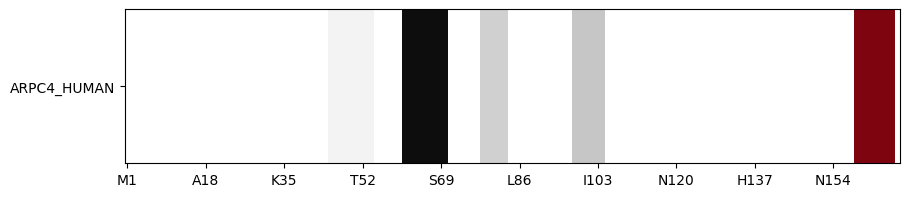

In [23]:
prot_to_plot = "ARPC4_HUMAN"
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
plot_pept_barcode(
    lip_pept_tryptic[lip_pept_tryptic["Protein"] == prot_to_plot],
    "Infected_16h/Mock_16h",
    prot_seq[prot_to_plot],
    sig_type="adj-p",
    sig_thr=0.05,
    ax=ax,
)

In [72]:
summary_cols = comparisons + [f"{c}{sig_type}" for c in comparisons]
# chimera_x_selections(df, "A")
display(matches[matches["protein"] == prot_to_plot])

,protein,comparison,lip_start,lip_end,lip_log2fc,lip_adj_pval,lip_pval,ptm_pept,ptm_number,ptm_log2fc,ptm_adj_pval,ptm_pval,ptm_type
9,ARPC4_HUMAN,Infected_16h/Mock_16h,159,168,1.487667,0.038454,0.006409,L.C@LENFSSQVVER.H; R.ATLQAALC@LENFSSQVVER.H,P59998@C21,-0.501930,0.043974,0.008167,Ox
10,ARPC4_HUMAN,Infected_16h/Mock_16h,159,168,1.487667,0.038454,0.006409,K.QADEIEKILC@HK.F,P59998@C87,-1.191325,0.023701,0.001023,Ox


### Examine EF2_HUMAN, which has significant ProK changes but not significant tryptic peptide changes, as a second example

In [41]:
display(
    lip_prok[lip_prok["Protein"] == "EF2_HUMAN"][
        [c for c in lip_prok.columns if "16h" in c and "8h" not in c and "24h" not in c]
    ]
    .sort_values("Infected_16h/Mock_16h_adj-p", key=abs, ascending=True)
    .head(5)  # only looking at top 5 most significant ProK sites
)

,Mock_16h missingness,Infected_16h missingness,Mock_16h_1,Mock_16h_2,Mock_16h_3,Mock_16h_4,Mock_16h_5,Infected_16h_1,Infected_16h_2,Infected_16h_3,Infected_16h_4,Infected_16h_5,Infected_16h/Mock_16h,Infected_16h/Mock_16h_pval,Infected_16h/Mock_16h_adj-p
EF2_HUMAN@L520,2,0,25.190514,25.529554,25.979786,NaN,NaN,27.885955,26.823122,27.304227,27.245963,27.281291,1.741493,0.000811,0.017835
EF2_HUMAN@F796,1,1,26.984374,27.175692,27.311726,NaN,27.310304,27.708987,27.868057,NaN,27.697290,27.886452,0.594673,0.000661,0.017835
EF2_HUMAN@V470,0,0,24.954253,25.343999,25.175149,24.766634,25.316042,25.881677,25.320764,25.653263,26.155241,25.772050,0.645383,0.006324,0.092754
EF2_HUMAN@F652,0,1,29.025568,29.240122,29.190842,28.667725,28.979051,NaN,29.429091,29.162100,29.538798,29.564556,0.402975,0.023723,0.260954
EF2_HUMAN@L319,3,1,26.109489,26.793399,NaN,26.201388,26.485952,26.694133,27.721392,NaN,27.629306,26.387590,0.710548,0.101656,0.559110


In [46]:
display(
    ptm_site[ptm_site["Protein"] == "EF2_HUMAN"][
        ["Protein", "Site"]
        + [
            c
            for c in ptm_site.columns
            if "16h" in c and "8h" not in c and "24h" not in c
        ]
    ]
    .sort_values("Infected_16h/Mock_16h_adj-p", key=abs, ascending=True)
    .head(13)  # "13" is manually adjusted to stop at 1st with adj-p > 0.05
)

,Protein,Site,Mock_16h missingness,Infected_16h missingness,Mock_16h_1,Mock_16h_2,Infected_16h_1,Infected_16h_2,Mock_16h_3,Mock_16h_4,Infected_16h_3,Infected_16h_4,Infected_16h/Mock_16h,Infected_16h/Mock_16h_pval,Infected_16h/Mock_16h_adj-p
8045,EF2_HUMAN,P13639@C41,0,0,25.403828,25.256585,24.999546,25.083452,25.299303,25.278494,25.096521,25.067395,-0.247824,0.000722,0.023169
8043,EF2_HUMAN,P13639@C290,0,0,27.844602,27.988526,27.551222,27.628709,27.786618,28.005089,27.606079,27.536111,-0.325678,0.001369,0.025134
8068,EF2_HUMAN,P13639@K571,0,0,14.942036,15.184549,15.775789,16.043981,14.655682,14.643816,16.639397,16.279114,1.328049,0.001032,0.026813
8067,EF2_HUMAN,P13639@K512,0,0,12.832154,13.390831,14.102842,14.338288,13.404381,12.777280,14.651662,13.951085,1.159808,0.002332,0.030316
8062,EF2_HUMAN,P13639@K330,0,0,15.443854,14.829197,15.911112,16.396647,15.540149,14.902955,16.546727,16.447624,1.146489,0.002539,0.031408
8065,EF2_HUMAN,P13639@K445,0,0,14.454210,13.251416,15.432128,14.809459,13.868997,13.399719,15.590466,15.299695,1.539351,0.002931,0.032210
8055,EF2_HUMAN,P13639@K258,0,0,12.035993,11.317478,12.870192,13.157544,12.291199,11.257628,13.657835,13.122904,1.476544,0.002952,0.032210
8046,EF2_HUMAN,P13639@C466,0,0,24.819646,24.709064,24.222858,24.431889,24.554789,24.900115,24.032005,23.943738,-0.588281,0.004250,0.033686
8061,EF2_HUMAN,P13639@K314,0,0,13.245663,12.548973,13.586167,13.736921,13.028237,13.058123,14.076676,13.807329,0.831525,0.003660,0.033735
8069,EF2_HUMAN,P13639@K594,0,0,12.798128,13.848557,14.858299,14.677957,13.945610,13.781739,14.777012,14.822090,1.190331,0.004533,0.035227


In [37]:
display(
    lip_prot[lip_prot["Protein"] == "EF2_HUMAN"][
        [c for c in lip_prot.columns if "16h" in c and "Mock" in c and "Infected" in c]
    ]
    .sort_values("Infected_16h/Mock_16h", key=abs, ascending=True)
    .dropna()
)

,Infected_16h/Mock_16h,Infected_16h/Mock_16h_pval,Infected_16h/Mock_16h_adj-p
EF2_HUMAN,-0.028867,0.71481,0.875979
